<h1 align="center">Analysis of Algorithms</h1>

### Scientific method applied to analysis of algorithms

A framework for predicting performance and comparing algorithms.

Scientific method:<br>
- **Observe** some feature of the natural world.
- **Hypothesize** a model that is consistent with the observations.
- **Predict** events using the hypothesis.
- **Verify** the predictions by making further observations.
- **Validate** by repeating until the hypothesis and observations agree.

Principles:<br>
- **Experiments** must be reproducible.
- **Hypotheses** must be falsifiable.

To give an idea of the difference between running algorithms with linear, linearithm and quadractic complexity, the plot below illustrates such curves using only 50 points. The higher the number of points, the higher the distance between $N\ log\ N$ and $N^2$ algorithms.

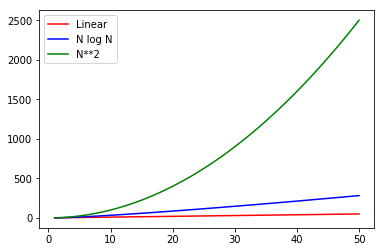

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

n = 50
x = []
linear, nlogn, n2 = [], [], []
for i in range(1, n+1):
    x.append(i)
    linear.append(i)
    nlogn.append(i*np.log2(i))
    n2.append(i**2)
plt.plot(x, linear, 'r-', label='Linear')
plt.plot(x, nlogn, 'b-', label='N log N')
plt.plot(x, n2, 'g-', label='N**2')
plt.legend()
plt.show()

## Observations

Problem: **3-SUM**: Given N distinct integers, how many triples sum to exactly zero?

Example: Considering 8 ints as:

$$30\ \ \ \ -40\ \ \ \ -20\ \ \ \ -10\ \ \ \ 40\ \ \ \ 0\ \ \ \ 10\ \ \ \ 5$$

| a[i] | a[j] | a[k] | sum |
| ---- | ---- | ---- | --- |
|  30  | -40  |  10  |  0  |
|  30  | -20  | -10  |  0  |
| -40  |  40  |   0  |  0  |
| -10  |   0  |  10  |  0  |

We could try the brute-force algorithm as:

In [16]:
class TreeSum(object):
    def __init__(self):
        pass

    def brute_force(self, a):
        N = len(a)
        count = 0
        for i in range(N):
            for j in range(i+1, N):
                for k in range(j+1, N):
                    sumall = a[i] + a[j] + a[k]
                    if (sumall == 0):
                        count += 1
        return count

In [23]:
v = [30, -40, -20, -10, 40, 0, 10, 5]
ts = TreeSum().brute_force(v)
print(ts)

4


Now, we will time the program to check its performance using `time` function:

In [29]:
import time

class Stopwatch(object):
    def __init__(self):
        self.start = time.time()
        
    def elapsed_time(self):
        self.end = time.time()
        return self.end - self.start

v = [30, -40, -20, -10, 40, 0, 10, 5]
t = Stopwatch()
ts = TreeSum().brute_force(v)
et = t.elapsed_time()
print('Time consumed: {} (seconds)'.format(et))

Time consumed: 0.000254154205322 (seconds)


Now let us create a bigger vector containing 4,000 entries.

In [30]:
import time
import random

v = [random.randint(-100,100) for _ in range(1000)]
t = Stopwatch()
ts = TreeSum().brute_force(v)
et = t.elapsed_time()
print('Time consumed: {} (seconds)'.format(et))

Time consumed: 21.7979860306 (seconds)


Let us check using a varied set of element in the vector:

In [33]:
nb_elements = [63, 125, 250, 500, 1000, 2000]
range_elem  = [50, 100, 100, 100, 300,  300]

tconsumed = []
for idx, nbe in enumerate(nb_elements):
    v = [random.randint(-range_elem[idx],range_elem[idx]) for _ in range(nb_elements[idx])]
    t = Stopwatch()
    ts = TreeSum().brute_force(v)
    et = t.elapsed_time()
    print('Time consumed with {} elements: {} (seconds)'.format(nb_elements[idx], et))
    tconsumed.append(et)

Time consumed with 63 elements: 0.00864410400391 (seconds)
Time consumed with 125 elements: 0.0530819892883 (seconds)
Time consumed with 250 elements: 0.35550904274 (seconds)
Time consumed with 500 elements: 2.73309993744 (seconds)
Time consumed with 1000 elements: 24.5575349331 (seconds)
Time consumed with 2000 elements: 236.33496213 (seconds)


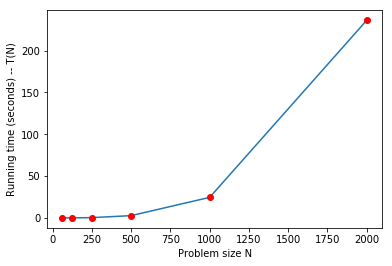

In [59]:
# Plotting time for each vector
plt.plot(nb_elements, tconsumed, '-')
plt.plot(nb_elements, tconsumed, 'ro')
plt.xlabel('Problem size N')
plt.ylabel('Running time (seconds) -- T(N)')
plt.show()

As we can see in the plot, using the brute-force our time grows exponentially according to the number of elements in our vector. A better visualization is presented using a log-log plot.

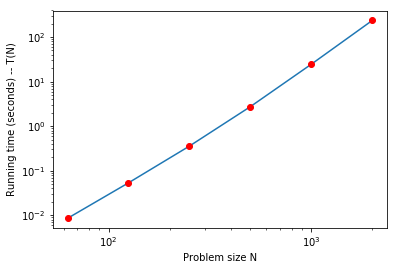

In [60]:
plt.loglog(nb_elements, tconsumed, '-')
plt.loglog(nb_elements, tconsumed, 'ro')
plt.xlabel('Problem size N')
plt.ylabel('Running time (seconds) -- T(N)')
plt.show()

Converting our plot into a log-log plot, we can see a straight line where

$$\lg(T(N)) = b \lg(N) + c$$

where $b$ is the slope of the straight line. Following the power-law equation that rules this problem ($a \times N^b$), we can calculate the values of $b$ and $a$. We can see the slope by the ratio of log2 ratios when doubling the size of the input. Thus, we have:

|     N     |       T(N)       | Ratio | Log2 Ratio |
| --------- | ---------------- | ----- | ---------- |
| 62.5 (63) | 0.00864410400391 |  --   |     --     |
|   125     | 0.0530819892883  |  6.14 |    2.62    |
|   250     | 0.35550904274    |  6.70 |    2.74    |
|   500     | 2.73309993744    |  7.69 |    2.94    |
|  1000     | 24.5575349331    |  8.98 |    3.16    |
|  2000     | 236.33496213     |  9.62 |    3.27    |

As we can see, the slope of the line is $b \approx 3$. This means that the order of growth of running time is $N^3$. In order to find $a$, we can run for a sufficient large value of $N$ and calculate its value as:

$T(N) = a \times N^b$<br>
$24.5575349331 = a \times 1000^{3}$<br>
$a = 2.46 \times 10^{-08}$<br>

From these equations, we can see that we have system independent effects, which determines the exponent of $b$ in power-law, such as the choosen algorithm and the input data. On the other hand, we have system dependent effects, which determine the constant $a$ in power-law, such as hardware (CPU, memory, cache, ...), software (compiler, interpreter, garbage collector, ...), system (operating system, network, other apps, ...).

# Mathematical Models for Running Time

The table below presents the cost of basic operations in algorithms, such as variable declaration, assignment statement, array length, string concatenation and so on. Time is represented as $c$ for constant time and $N$ is the length of the array or string.

| Operation            | Example          | Time        |
| -------------------- | ---------------- | ----------- |
| Variable declaration | a = 0            | $c_1$       |
| Assignment statement | a = b            | $c_2$       |
| Integer compare      | a < b            | $c_3$       |
| Array element access | a[i]             | $c_4$       |
| Array length         | len(a)           | $c_5$       |
| 1D array location    | v = [0]*N        | $c_6 N$     |
| 2D array location    | v = ([0]*N)[0]*N | $c_7 N^2$   |
| String length        | len(s)           | $c_8$       |
| Substring extraction | s[N/2:N]         | $c_9$       |
| String concatenation | s + t            | $c_{10} N$  |

In the example below, we illustrate the time to compute a 1-Sum algorithm where we have an array of size $N$ and we go through it looking for elements that are equal to zero.

```python
count = 0
for i in range(N):
    if a[i] == 0:
        count += 1
```

If we calculate each operation, we have:

| Operation            | Frequency                             |
| -------------------- | ------------------------------------- |
| Variable declaration | $N + 2$                               |
| Assignment statement | $N + 2$                               |
| Less than compare    | $\tfrac{1}{2} (N+1)(N+2)$             |
| Equal to compare     | $\tfrac{1}{2} N(N-1)$                 |
| Array access         | $N(N-1)$                              |
| Increment            | $\tfrac{1}{2} N(N-1)\ \ to\ \ N(N-1)$ |

For example, in `Less than compare`, we have:

$$0 + 1 + 2 + \ldots + (N-1) = \left(\begin{matrix} N \\ 2 \end{matrix} \right) = \frac{1}{2} N(N-1)$$

Assuming that $N$ is large, most terms are negligible. Thus, we discard lower-order terms and keep only the term with highest order. In our example above, the array access contains `N(N-1)` operations, which leads to $\sim N^2$. To estimate the discrete sum, we can convert sums into integrals and use calculus. For example, 

**Ex1**: $1 + 2 + \ldots + N \ \ \ \ \ \ \sum_{i=1}^{N} i \ \ \ \ \ \ \sim \ \ \ \ \ \ \int_{x=1}^N x dx \ \ \ \sim \ \ \ \frac{1}{2} N^2$<br>
**Ex2**: $1^k + 2^k + \ldots + N^k \ \ \ \ \ \ \sum_{i=1}^{N} i^k \ \ \ \ \ \ \sim \ \ \ \ \ \ \int_{x=1}^N x^k dx \ \ \ \sim \ \ \ \frac{1}{k+1} N^{k+1}$<br>
**Ex3**: $1 + \cfrac{1}{2} + \frac{1}{3} + \ldots + \frac{1}{N} \ \ \ \ \ \ \sum_{i=1}^{N} \frac{1}{i} \ \ \ \sim \ \ \ \ \ \ \int_{x=1}^N \frac{1}{x} dx \ \ \ \ \ \ \sim \ \ \ \ln N$<br>
**Ex4**: $\text{3-Sum triple loop} \ \ \ \ \ \ \sum_{i=1}^{N} \sum_{j=i}^{N} \sum_{k=j}^{N} 1 \ \ \ \sim \ \ \ \ \ \ \int_{x=1}^N \int_{y=x}^N \int_{z=y}^N dz dy dx \ \ \ \ \ \ \sim \ \ \ \frac{1}{6} N^3$<br>

# Order of Growth Classification

When computing time of execution of algorithms, we have a small set of functions that we must consider. In order of growth, we have:

$$1,\ \ \ \log N,\ \ \ N,\ \ \ N \log N,\ \ \ N^2,\ \ \ N^3,\ \ \ \text{and},\ \ \ 2^N$$ 

The image below illustrates the order of growth of each function.

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/log-log_plot.svg" width="35%" align="center"/>

Below we have a table presenting each order of growth with an example when they occur:

| Order of growth | Name         | Typical code framework                          | Description        | Example           | T(2N)/T(N) |
| --------------- | ------------ | ----------------------------------------------- | ------------------ | ----------------- | ---------- |
| $1$             | constant     | a = b + c                                       | statement          | add 2 numbers     | 1          |
| $\log N$        | logarithm    | while (N>1): N=N/2                              | divide in half     | binary search     | ~1         |
| $N$             | linear       | for i in range(N)                               | loop               | find maximum      | 2          |
| $N \log N$      | linearithmic | merge sort                                      | divide and conquer | mergesort         | ~2         |
| $N^2$           | quadratic    | [j for j in [i for i in range(N)]]              | double loop        | check all pairs   | 4          |
| $N^2$           | cubic        | [k for k in [j for j in [i for in range(N)]]]   | triple loop        | check all triples | 8          |
| $2^N$           | exponential  | combinatorial search                            | exaustive search   | check all subsets | T(N)       |

An example for a better understanding is the binary search. In this type of search, we have an ordered set in which we want to find a number (*e.g.*, 33). In order to find the number, we divide the set into half and verify if the centered number is greater, smaller or equal to the target number. In case it is the target number, we return this number. In case it is smaller, we divide the lower set into two subsets and verify the centered number of this subset, and so on. The image below illustrates the application of the binary search.

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/Coursera/Princeton/Algorithms-Part-1/Week%201/images/binary_search.svg" width="60%" align="center"/>


Below we have the algorithm: 

In [83]:
def binary_search(vec, key, debug=True):
    lo = 0
    hi = len(vec)-1
    if debug:
        print('Init lo: {}'.format(vec[lo]))
        print('Init hi: {}'.format(vec[hi]))
    while lo <= hi:
        mid = lo + (hi - lo)/2
        if debug: print('Found mid: {}'.format(vec[mid]))
        if key < vec[mid]: 
            hi = mid - 1
            if debug: print('Changing hi to: {}'.format(vec[hi]))
        elif key > vec[mid]:
            lo = mid + 1
            if debug: print('Changing lo to: {}'.format(vec[lo]))
        else:
            if debug: print('Return index to mid: {}'.format(vec[mid]))
            return mid
    return -1

vec = [6, 13, 14, 25, 33, 43, 51, 53, 64, 72, 84, 93, 94, 95, 97]
key = 33
print('{} is in index {}'.format(key, binary_search(vec, key, debug=False)))

33 is in index 4


As we can see, binary search uses at most $1 + \lg N$ key compares to search in a sorted array of size $N$. 

An example to illustrate an $N^2 \log N$ is the 3-Sum approach using a binary search. In order to do that, we first sort the vector and then apply a binary search to find is exists a number equals to the sum of two elements. Thus, the algorithm works as:<br>
- Step 1: Sort the $N$ (distinct) numbers
- Step 2: For each pair of numbers `a[i]` and `a[j]`, binary search for `-(a[i]+a[j])`.

Thus, consider an input:

$$[30 \ \ \ -40 \ \ \ -20 \ \ \ -10 \ \ \ 40 \ \ \ 0 \ \ \ 10 \ \ \ 5]$$

We first sort elements resulting:

$$[-40 \ \ \ -20 \ \ \ -10 \ \ \ 0 \ \ \ 5 \ \ \ 10 \ \ \ 30 \ \ \ 40]$$

Then, we perform binary search as:

$\begin{matrix}
(-40, & -20) & = & 60 \\
(-40, & -10) & = & 50 \\
(-40, &   0) & = & \textbf{40} \\
(-40, &  -5) & = & 35 \\
(-40, &  10) & = & \textbf{30} \\
\vdots&\vdots& = & \vdots \\
(-40, &  40) & = & 0 \times \\
\vdots&\vdots& = & \vdots \\
(-20, & -10) & = & \textbf{30} \\
\vdots&\vdots& = & \vdots \\
(-10, &   0) & = & \textbf{10} \ast\\
\vdots&\vdots& = & \vdots \\
(10,  &  30) & = & -40\times \ast\\
(10,  &  40) & = & -50 \\
(30,  &  40) & = & -70 \\  
\end{matrix}$

$\ast$ only count if `a[i] < a[j] < a[k]` to avoid double counting.

In this algorithm, we have the order of growth of $N^2 \log N$ since the Step 1 has $N^2$ with insertion sort, and Step 2 has $N^2 \log N$ with binary search. 

# Theory of Algorithms

In theory of algorithms, we have three types of analyses: **Best case** (*i.e.*, the lower bound on cost),  **Worst case** (*i.e.*, the upper bound on cost), and **Average case** (*i.e.*, the expected cost for random input). Some algorithms have the same value of all cases. For example, when considering the array accesses for brute-force in the 3-Sum algorithm, we have:

- Best case: $~ \frac{1}{2} N^3$
- Worst case: $~ \frac{1}{2} N^3$
- Average case: $~ \frac{1}{2} N^3$

Other algorithms have different values for best and worst case. For example, if we consider the binary search algorithm, we have:

- Best case: $~ 1$
- Worst case: $~ \lg N$
- Average case: $~ \lg N$

In theory of algorithms, we have the goal to establish what is the "difficulty" of a problem. This can lead to develop "optimal" algorithms. In order to establish the difficulty of a problem, we usually suppress details in analysis and eliminate any variability in input model by focusing only on the worst case. An optimal algorithm is the one where the performance is guarantee (to within a constant factor) for any input. Thus, no algorithm can provide a better performance guarantee.

## Commonly-Used Notations

In order to specify the difficulty of an algorithm, it is common to use some notations, as described in the table below:

| Notation  | Provides                   | Example       | Shorthand for                     | Used to                   |
| :-------- | :------------------------- | :------------ | :-------------------------------- | :------------------------ | 
| Tilde     | Leading term               | $~ 10N^2$     | $10 N^2+22N \log N$, $10N^2 + 37$ | Provide approximate model |
| Big Theta | Asymptotic order of growth | $\Theta(N^2)$ | $10 N^2$, $5N^2+22N\log N + 3N$   | Classify algorithms       |
| Big Oh    | $\Theta(N^2)$ and smaller  | $O(N^2)$      | $100N^2$, $100N$, $22N \log N+3N$ | Develop upper bounds      |
| Big Omega | $\Theta(N^2)$ and larger   | $\Omega(N^2)$ | $N^5$, $N^3 + 22N \log N + 3N$    | Develop lower bounds      |

We can understand each of these notations as **Big Oh** being the upper bound of the algorithm, **Big Omega** being the lower bound and the **Big Theta** the optimal algorithm. For example, consider the problem of 1-Sum, where the goal is to find a 0 in the array. In this case:

- **Upper bound**: Look at every array entry, which indicates the difficulty as $O(N)$;
- **Lower bound**: Proof that no algorithm can do better, since we have to examine all $N$ entries, indicating the difficulty of $\Omega(N)$;
- **Optimal algorithm**: In this case, the lower bound equals the upper bound, and thus, the difficulty is $\Theta(N)$.

We only have a big Theta when the upper bound overlaps the lower bound, *i.e.*, they are the same for different inputs. An example where we do not have a big Theta is the 3-Sum algorithm. In this case:

- **Upper bound**: The brute-force algorithm has a $O(N^3)$; For the improved version of the algorithm, we have a $O(N^2 \log N)$;
- **Lower bound**: Have to examine all $N$ entries to solve 3-Sum, leading to a $\Omega(N)$;
- **Optimal algorithm**: There is no optimal algorithm. 

# Memory

For understanding memory consumption, we first review some basic concepts. A bit is composed of 0 or 1, while a byte contains 8 bits. A Megabyte (MB) contains $2^{20}$ bytes while a Gigabyte (GB) contains $2^{30}$ bytes. The typical memory usage (for Java language) for primitive types and arrays is presented in the table below:

| Type       | Bytes      | $\hspace{30pt}$ | Type         |  Bytes     |
| ---------- | ---------- |---------------- | ------------ | ---------- |
| boolean    | 1          | $\hspace{30pt}$ | char[ ]      | 2N + 24    |
| byte       | 1          | $\hspace{30pt}$ | int[ ]       | 4N + 24    |
| char       | 2          | $\hspace{30pt}$ | double[ ]    | 8N + 24    |
| int        | 4          | $\hspace{30pt}$ | char[ ][ ]   | $\sim 2MN$ |
| float      | 4          | $\hspace{30pt}$ | int[ ][ ]    | $\sim 4MN$ |
| long       | 8          | $\hspace{30pt}$ | double[ ][ ] | $\sim 8MN$ |
| double     | 8          | $\hspace{30pt}$ |              |            |

For objects, we have an overhead (usually 16 bytes), a reference (8 bytes) and padding (a multiple of 8 bytes). For example, a `Date` object declared as:

```python
class Date(object):
    def __init__(self):
        day = 0
        month = 0
        year = 0
```

We have a distribution of:

| Object            | Bytes         |
| ----------------- | ------------- |
| *Object Overhead* | 16 bytes      |
| day               | 4 bytes (int) |
| month             | 4 bytes (int) |
| year              | 4 bytes (int) |
| *padding*         | 4 bytes       |
| **TOTAL**         | **32** bytes  |

A second example illustrates the consumption of memory for an object called `String`. Its definition is presented below:

```python
class String(object):
    def __init__(self):
        value = []
        offset = 0
        count = 0
        hash  = 0
```
For this object, we have a distribution of:

| Object            | Bytes                                                             |
| ----------------- | ----------------------------------------------------------------- |
| *Object Overhead* | 16 bytes                                                          |
| value             | 8 bytes (reference to array) + 2N +24 bytes (values of the array) |
| offset            | 4 bytes (int)                                                     |
| count             | 4 bytes (int)                                                     |
| hash              | 4 bytes (int)                                                     |
| *padding*         | 4 bytes                                                           |
| **TOTAL**         | **2N + 64** bytes                                                 |

As the table above illustrates the typical size of elements in Java language, we can verify how many bites each variable is consumed in Python language. Python has the function `sys.getsizeof()` that returns the size of a variable in terms of bytes.

In [98]:
import sys

class Date(object):
    def __init__(self):
        day = 0
        month = 0
        year = 0

class String(object):
    def __init__(self):
        value = []
        offset = 0
        count = 0
        hash_ = 0

var_int = 0
var_str = 'a'
var_arr = []
var_mat = [[]]
var_obj_dat = Date()
var_obj_str = String()

print('Size of variable (integer): {} bytes'.format(sys.getsizeof(var_int)))
print('Size of variable (string): {} bytes'.format(sys.getsizeof(var_str)))
print('Size of variable (array): {} bytes'.format(sys.getsizeof(var_arr)))
print('Size of variable (matrix): {} bytes'.format(sys.getsizeof(var_mat)))
print('Size of variable (object Date): {} bytes'.format(sys.getsizeof(var_obj_dat)))
print('Size of variable (object String): {} bytes'.format(sys.getsizeof(var_obj_str)))


Size of variable (integer): 24 bytes
Size of variable (string): 38 bytes
Size of variable (array): 72 bytes
Size of variable (matrix): 80 bytes
Size of variable (object Date): 64 bytes
Size of variable (object String): 64 bytes


# Questions

1. Suppose that $n$ equals 1 million. Approximately how much faster is an algorithm that performs $n \lg n$ operations versus one that performs $n^2$ operations? Recall that $\lg$ is the base-2 logarithm function.<br>

&#9744; 20x<br>
&#9744; 1,000x<br>
&#9745; 50,000x<br>
&#9744; 1,000,000x

In [3]:
# Solution
import numpy as np
n = 1000000
nlogn = n*np.log2(n)
n2 = n**2
print float(n2)/nlogn

50171.66594399687


2. Suppose that you make the following observations of the running time $T(n)$ (in seconds) of a program as a function of the input size $n$. Which of the following functions best models the running time $T(n)$?

|    n   | T(n) |
| ------ | ---- |
|  1,000 |  0.0 |
|  2,000 |  0.0 |
|  4,000 |  0.1 |
|  8,000 |  0.3 |
| 16,000 |  1.3 |
| 32,000 |  5.1 |
| 64,000 | 20.5 |

&#9744; $3.3 \times 10^{-4} \times n$<br>
&#9744; $n^2$<br>
&#9745; $5.0 \times 10^{-9} \times n^2$<br> 
&#9744; $6.25 \times 10^{-9} \times n^2$

**Solution**: The solution is presented below:

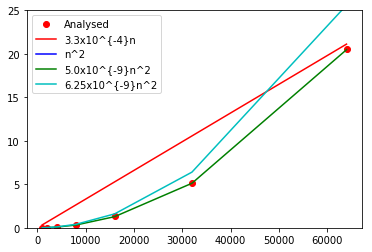

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

x = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
curve = [0.0, 0.0, 0.1, 0.3, 1.3, 5.1, 20.5]
a, b, c, d = [], [], [], []
for i in x:
    a.append(3.3*(10**-4)*i)
    b.append(i**2)
    c.append(5.0*(10**-9)*(i**2))
    d.append(6.25*(10**-9)*(i**2))

plt.plot(x, curve, 'ro', label='Analysed')
plt.plot(x, a, 'r-', label='3.3x10^{-4}n')
plt.plot(x, b, 'b-', label='n^2')
plt.plot(x, c, 'g-', label='5.0x10^{-9}n^2')
plt.plot(x, d, 'c-', label='6.25x10^{-9}n^2')
plt.ylim((0, 25))
plt.legend()
plt.show()


3. How many array accesses does the following code fragment make as a function of $n$?<br>
(Assume the compiler does not optimize away any array accesses in the innermost loop.)<br>


```python
nbsum = 0
for i in range(n):
    for j in range(i, n):
        for k in range(j, n, k*2):
            if a[i] + a[j] >= a[k]:
                sum += 1
```
&#9744; $\sim 3n^2$<br>
&#9745; $\sim \frac{3}{2}n^2 \lg n$<br>
&#9744; $\sim \frac{3}{2}n^3$<br>
&#9744; $\sim 3n^3$

4. Which of the following order-of-growth classifications represents the maximum number of array accesses used to binary search a sorted array of length $n$?<br>

&#9744; constant<br>
&#9745; logarithmic<br>
&#9744; linear<br>
&#9744; linearithmic

5. Which of the following functions is $O(n^3)$?<br>

&#9744; $11n + 15 \lg n + 100$<br>
&#9744; $\frac{1}{3} n^2$<br>
&#9744; $25,000 n^3$<br>
&#9745; All of the above

6. How much memory (in bytes) does a `WeightedQuickUnionUF` object use as a function of the number of elements $n$?<br>

&#9744; $\sim n$<br>
&#9744; $\sim 2n$<br>
&#9744; $\sim 4n$<br>
&#9745; $\sim 8n$

**Solution**: Considering that each array of integers consume `4n+24` of memory and that we have 2 arrays with size `n`, the WeightedQuickUnionUF uses a total of $\sim 8n$ of memory. 

```python
class WeightedQuickUnionUF(object):
    def __init__(self, N): 
        self.id = [i for i in range(N)]
        self.sz = [1]*N
```

# Interview Questions: Analysis of Algorithms

1. **3-SUM in quadratic time**. Design an algorithm for the 3-SUM problem that takes time proportional to $n^2$ in the worst case. You may assume that you can sort the $n$ integers in time proportional to $n^2$ or better.
 
**Answer**: For a quadratic time, we can sort the array and then perform a loop on this array up to its length-2. Inside this loop, we can sum the current value (i) with the next value (j=i+1) and the latest value (k=len(array)-1). In case the sum equal zero, we count+1. In case the sum is greater than zero, we decrease the latest value (k-1). In case the sum is smaller than zero, we increase the next value (j+1), and so on. The algorithm can be seen below:

In [113]:
class TreeSumQuadratic(object):
    def __init__(self, vec):
        self.vec = sorted(vec)
        self.triplets = []

    def sum_zero(self):
        print('Sorted vector: {}'.format(self.vec))
        for i in range(len(self.vec)-2):
            #print i
            j = i+1
            k = len(self.vec)-1
 
            while j < k:
                summer = self.vec[i] + self.vec[j] + self.vec[k]
                #print i, j, k, summer
                if summer == 0:
                    self.triplets.append((self.vec[i], self.vec[j], self.vec[k]))
                if summer > 0:
                    k -= 1
                else:
                    j += 1
        return self.triplets
        
v = [30, -40, -20, -10, 40, 0, 10, 5]
tsq = TreeSumQuadratic(v)
triplets = tsq.sum_zero()
print('Triplets that the sum equals zero.')
for t in triplets:
    print(t)

Sorted vector: [-40, -20, -10, 0, 5, 10, 30, 40]
Triplets that the sum equals zero.
(-40, 0, 40)
(-40, 10, 30)
(-20, -10, 30)
(-10, 0, 10)


2. **Search in a bitonic array**. An array is bitonic if it is comprised of an increasing sequence of integers followed immediately by a decreasing sequence of integers. Write a program that, given a bitonic array of $n$ distinct integer values, determines whether a given integer is in the array.

a. *Standard version*: Use $\sim 3 \lg n$ compares in the worst case.<br>
b. *Signing bonus*: Use $\sim 2 \lg n$ compares in the worst case (and prove that no algorithm can guarantee to perform fewer than $\sim 2 \lg n$ compares in the worst case).

**Answer**: In the standard version, first, we find the two vectors representing the bitonic array, which would consume $\sim 1 \lg N$. Next, we perform a binary search in each array to find if the integer is in it. For the signing bonus, we only perform the binary search in the array verifying when it inverts the order of increasing/decreasing.

In [234]:
# Implementation of the **Search in a bitonic array** question.
class Bitonic(object):
    def __init__(self, vec):
        self.vec = vec
        
    def find_division(self, lo, hi):
        #print self.vec[start:end] 
        mid = lo + (hi - lo)/2
        if self.vec[mid+1] > self.vec[mid]:
            lo = mid
            vinc, vdec = self.find_division(lo, hi)
        elif self.vec[mid-1] > self.vec[mid]:
            hi = mid
            vinc, vdec = self.find_division(lo, hi)
        else:
            return self.vec[:mid], self.vec[mid:]
        return vinc, vdec
    
    
    def search(self, lo, hi, target, inc):
        while lo <= hi:
            mid = lo + (hi - lo)/2
            #print lo, hi, mid, target, self.vec[mid]
            if target == self.vec[mid]:
                return True
            elif target > self.vec[mid]:
                if inc: lo = mid+1
                else: hi = mid-1                
            elif target < self.vec[mid]:
                if inc: hi = mid-1
                else: lo = mid+1
        return False
        
    
    def binary_search(self, target):
        lo = 0
        hi = len(self.vec)-1
        inc = False
        if self.vec[lo] < self.vec[hi]: 
            inc = True
        return self.search(lo, hi, target, inc)
    

    def binary_bitonic(self, target):
        lo = 0
        hi = len(self.vec)-1
        himax = len(self.vec)-1
        
        while lo <= hi:
            mid = lo + (hi - lo)/2
            #print lo, hi, mid, vec[mid]
            if self.vec[mid] == target:
                return True
            if self.vec[mid+1] > self.vec[mid]:
                if self.vec[mid] > target:
                    hi = mid-1
                    return self.search(lo, hi, target, True)
                else:
                    lo = mid+1
            else:
                if self.vec[mid] > target and self.vec[himax] <= target:
                    lo = mid+1
                    return self.search(lo, hi, target, False)
                else:
                    hi = mid-1
                    
        return False

In [147]:
# test find_division
v1 = [1,2,3,4,5,15,14,13,12,11,10]
v2 = [1,2,3,4,5,6,7,8,9,10,11,20,19,18,17,16,15]
v3 = [1,2,3,15,14,13,12,11,10,9,8,7]

def test_division(v):
    vbit = Bitonic(v)
    vinc, vdec = vbit.find_division(0, len(v)-1)
    print('Testing vector: {}'.format(v))
    print('Division of vectors:')
    print('   {}'.format(vinc))
    print('   {}'.format(vdec))
    print
    
test_division(v1)
test_division(v2)
test_division(v3)

Testing vector: [1, 2, 3, 4, 5, 15, 14, 13, 12, 11, 10]
Division of vectors:
   [1, 2, 3, 4, 5]
   [15, 14, 13, 12, 11, 10]

Testing vector: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 19, 18, 17, 16, 15]
Division of vectors:
   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
   [20, 19, 18, 17, 16, 15]

Testing vector: [1, 2, 3, 15, 14, 13, 12, 11, 10, 9, 8, 7]
Division of vectors:
   [1, 2, 3]
   [15, 14, 13, 12, 11, 10, 9, 8, 7]



In [192]:
# test binary search
vinc = [1,2,4,6,7,8,9,10,11]
vdes = [10,9,8,7,6,4,2,1,0]
target_has = 4
target_hasnt = 3

def test_search(v, target):
    vbit = Bitonic(v)
    found = vbit.binary_search(target)
    print 'The target {} was found? - {}'.format(target, found)
    
test_search(vinc, target_has)
test_search(vinc, target_hasnt)
test_search(vdes, target_has)
test_search(vdes, target_hasnt)

The target 4 was found? - True
The target 3 was found? - False
The target 4 was found? - True
The target 3 was found? - False


In [233]:
# test binary on bitonic search
v1 = [1,2,3,15,14,13,12,11,10]
v2 = [1,2,3,5,6,7,8,9,13,12,11]
target1 = 2
target2 = 11
target3 = 4

def test_search(v, target):
    vbit = Bitonic(v)
    found = vbit.binary_bitonic(target)
    print 'The target {} was found? - {}'.format(target, found)
    
test_search(v1, target1)
test_search(v1, target2)
test_search(v1, target3)
print
test_search(v2, target1)
test_search(v2, target2)
test_search(v2, target3)

The target 2 was found? - True
The target 11 was found? - True
The target 4 was found? - False

The target 2 was found? - True
The target 11 was found? - True
The target 4 was found? - False


3. **Egg drop**. Suppose that you have an $n$-story building (with floors 1 through $n$) and plenty of eggs. An egg breaks if it is dropped from floor $T$ or higher and does not break otherwise. Your goal is to devise a strategy to determine the value of $T$ given the following limitations on the number of eggs and tosses:

   - Version 0: 1 egg, $\le T$ tosses.
   - Version 1: $ \sin 1 \lg n$ eggs and $\sin 1 \lg n$ tosses.
   - Version 2: $ \sin \lg T$ eggs and $\sin 2 \lg T$ tosses.
   - Version 3: $2$ eggs and $\sin 2 \sqrt{n}$ tosses.
   - Version 4: $2$ eggs and $\le c \sqrt{T}$ tosses for some fixed constant $c$.
   
**Answer**: Below we have the explanation for each version of the problem:

   - Version 0: we have can perform a sequential search, trying from floor 1 to T when the egg breaks. 
   - Version 1: we can perform a binary search as our number of eggs is equal to the number of tosses ($1 \lg T$). We toss the egg from $\frac{n}{2}$ floor, if it breaks, we go to the $\frac{n}{4}$ floor and toss it, and so on. 
   - Version 2: we can increase floors by $2^f$ up to a number bigger than T (when the egg breaks). This tells us that T must be between $2^f$ and $2^{f-1}$. Next, we can perform a binary search on the resulting floors, which would lead to $+1 \lg T$ tosses. 
   - Version 3: we can increase the floors by $\sqrt{n}$. When the egg breaks from floor $f$, we know that the value of $T$ is between $f$ and $f-1$. Thus, we can increase each floor from $f-1$ to $f$ and verify $T$ when the first egg breaks. 
   - Version 4: we increase the number of floors as: 1, 1+2, 1+2+3, 1+2+3+4, ..., 1+2+3+4+...+$f$. We stop when the first egg breaks. Thus, we know that the value of $T$ is between 1+2+3+4+...+f and 1+2+3+4+...+f-1. In this interval, we have more $f$ floors to test.  